In [3]:
!pip install tensorflow

     |████████████████████████████████| 86.3MB 9.0MB/s eta 0:00:014   |██▎                             | 6.1MB 1.7MB/s eta 0:00:48     |███                             | 7.9MB 3.6MB/s eta 0:00:22     |███▌                            | 9.5MB 3.6MB/s eta 0:00:22     |█████▊                          | 15.6MB 8.6MB/s eta 0:00:09     |██████                          | 16.2MB 8.6MB/s eta 0:00:09     |██████▋                         | 17.9MB 8.6MB/s eta 0:00:08     |███████▌                        | 20.2MB 10.5MB/s eta 0:00:07��██▉             | 50.8MB 1.2MB/s eta 0:00:29     |███████████████████             | 51.4MB 1.2MB/s eta 0:00:29     |███████████████████▎            | 52.1MB 1.2MB/s eta 0:00:28     |████████████████████▏           | 54.4MB 7.2MB/s eta 0:00:05     |█████████████████████▋          | 58.3MB 7.2MB/s eta 0:00:04     |██████████████████████▍         | 60.4MB 6.0MB/s eta 0:00:05     |███████████████████████████▌    | 74.2MB 7.6MB/s eta 0:00:02
     |██████████████████████████

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, os.path, PIL
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
DIR = './data/Cyrillic'
chars=os.listdir(DIR)
count=dict()
for char in chars:
    count.update({char:len(os.listdir(DIR+'/'+char))})
print(count)

{'Б': 444, 'Ф': 463, 'Ж': 462, 'У': 551, 'Ъ': 459, 'П': 474, 'Э': 458, 'И': 447, 'Ь': 427, 'Ы': 415, 'О': 465, 'З': 431, 'Т': 456, 'А': 469, 'Х': 486, 'Ё': 344, 'Й': 466, 'I': 247, 'Е': 576, 'Р': 493, 'В': 487, 'Ч': 464, 'Ю': 461, 'Л': 433, 'Щ': 446, 'М': 470, 'Ш': 431, 'Н': 508, 'Я': 438, 'К': 459, 'Г': 424, 'Ц': 448, 'Д': 465, 'С': 513}


In [6]:
from skimage import io
from skimage import img_as_float
from skimage.transform import resize
from PIL import Image

img_collection_arr=dict()
img_collection=dict()
for key,value in count.items():
    folder=os.path.join('./data/Cyrillic/',key)
    allfiles=os.listdir(folder)
    imlist=[filename for filename in allfiles if filename[-4:] in [".png",".PNG"]]
    # Assuming all images are the same size, get dimensions of first image
    for image in imlist:
        filename=os.path.join(folder,image)
        camera = io.imread(filename,-1)
        image_file = Image.open(filename) # opens image  
        img = image_file.convert('LA').resize((28,28)) # converts to grayscale w/ alpha
        image_1=np.array(img)
#         print(image_1.shape)
#         MPL.imshow(img)
#         MPL.show()
        if(key not in img_collection_arr.keys()):
            img_collection_arr.update({key:[image_1]})
        else:
            if(len(img_collection_arr[key])<200):
                img_collection_arr[key].append(image_1)
    print(img_collection_arr.keys())

dict_keys(['Б'])
dict_keys(['Б', 'Ф'])
dict_keys(['Б', 'Ф', 'Ж'])
dict_keys(['Б', 'Ф', 'Ж', 'У'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы', 'О'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы', 'О', 'З'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы', 'О', 'З', 'Т'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы', 'О', 'З', 'Т', 'А'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы', 'О', 'З', 'Т', 'А', 'Х'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы', 'О', 'З', 'Т', 'А', 'Х', 'Ё'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы', 'О', 'З', 'Т', 'А', 'Х', 'Ё', 'Й'])
dict_keys(['Б', 'Ф', 'Ж', 'У', 

In [12]:
count=dict()
for key,val in img_collection_arr.items():
    count.update({key:len(val)})
print(count)

{'Б': 200, 'Ф': 200, 'Ж': 200, 'У': 200, 'Ъ': 200, 'П': 200, 'Э': 200, 'И': 200, 'Ь': 200, 'Ы': 200, 'О': 200, 'З': 200, 'Т': 200, 'А': 200, 'Х': 200, 'Ё': 200, 'Й': 200, 'I': 200, 'Е': 200, 'Р': 200, 'В': 200, 'Ч': 200, 'Ю': 200, 'Л': 200, 'Щ': 200, 'М': 200, 'Ш': 200, 'Н': 200, 'Я': 200, 'К': 200, 'Г': 200, 'Ц': 200, 'Д': 200, 'С': 200}


In [7]:
import matplotlib.pyplot as MPL
from sklearn.model_selection import train_test_split
X=[];y=[]
class_names = list(img_collection_arr.keys())
for key,imgs in img_collection_arr.items():
    [X.append(img) for img in imgs]
    [y.append([class_names.index(key)]) for img in imgs]
#     for img in imgs:
#         print(img.shape)
#     print(img)
#     MPL.imshow(img)
#     MPL.show()
train_images, test_images, train_labels, test_labels = train_test_split(np.array(X), np.array(y), 
                                                    test_size=0.2, 
                                                    random_state=0)

In [21]:
print('classes:',class_names)
print('number of category:',len(class_names))
print("train image collection:",type(train_images),
      "\ntrain image:",type(train_images[0]),
      '\ntraining label collection:',type(train_labels),
      '\ntraining label:',type(train_labels[0]))
print('shape of training image:',train_images[0].shape)

classes: ['Б', 'Ф', 'Ж', 'У', 'Ъ', 'П', 'Э', 'И', 'Ь', 'Ы', 'О', 'З', 'Т', 'А', 'Х', 'Ё', 'Й', 'I', 'Е', 'Р', 'В', 'Ч', 'Ю', 'Л', 'Щ', 'М', 'Ш', 'Н', 'Я', 'К', 'Г', 'Ц', 'Д', 'С']
number of category: 34
train image collection: <class 'numpy.ndarray'> 
train image: <class 'numpy.ndarray'> 
training label collection: <class 'numpy.ndarray'> 
training label: <class 'numpy.ndarray'>
shape of training image: (28, 28, 2)


In [9]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 2)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(len(class_names), activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        608       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 11, 11, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          3

In [10]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 5440 samples, validate on 1360 samples
Epoch 1/10
5440/5440 [==============================] - 12s 2ms/sample - loss: 1.8315 - accuracy: 0.5046 - val_loss: 1.2628 - val_accuracy: 0.6382
Epoch 2/10
5440/5440 [==============================] - 11s 2ms/sample - loss: 0.6409 - accuracy: 0.8173 - val_loss: 0.8388 - val_accuracy: 0.7574
Epoch 3/10
5440/5440 [==============================] - 10s 2ms/sample - loss: 0.3661 - accuracy: 0.8943 - val_loss: 0.5372 - val_accuracy: 0.8434
Epoch 4/10
5440/5440 [==============================] - 10s 2ms/sample - loss: 0.2052 - accuracy: 0.9474 - val_loss: 0.6008 - val_accuracy: 0.8191
Epoch 5/10
5440/5440 [==============================] - 11s 2ms/sample - loss: 0.1234 - accuracy: 0.9704 - val_loss: 0.4653 - val_accuracy: 0.8691
Epoch 6/10
5440/5440 [==============================] - 10s 2ms/sample - loss: 0.0783 - accuracy: 0.9829 - val_loss: 0.4719 - val_accuracy: 0.8618
Epoch 7/10
5440/5440 [==============================] - 11s 2ms/sample

1360/1 - 1s - loss: 0.3869 - accuracy: 0.8853
test accuracy: 0.88529414


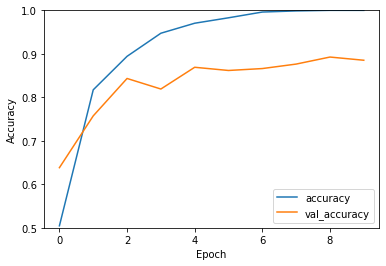

In [11]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print("test accuracy:",test_acc)